В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

,
**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



<span style="color:green"> Посилання тут https://github.com/BloomingPlum/machine_learning/blob/main/process_bank_churn.py </span> 

In [97]:
!curl -O  https://raw.githubusercontent.com/BloomingPlum/machine_learning/main/process_bank_churn.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10045  100 10045    0     0    98k      0 --:--:-- --:--:-- --:--:--  101k


In [98]:
from process_bank_churn import preprocess_data, preprocess_new_data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import roc_auc_score
import os

In [99]:
# Automatically reloads external Python modules when changes are made,
# so we don't need to restart the kernel or re-import them manually.
%reload_ext autoreload
%autoreload 2

In [100]:
raw_df = pd.read_csv('train.csv')
data = preprocess_data(raw_df, scaler_numeric=False)

In [101]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']
encoder = data['encoder']
scaler = data['scaler']

In [102]:
#Подивимось чи відображаються всі потрібні нам колонки 
X_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
model = DecisionTreeClassifier(random_state=42)

In [105]:
%%time
model.fit(X_train, train_targets)

Wall time: 42.8 ms


DecisionTreeClassifier(random_state=42)

In [106]:
from sklearn.metrics import roc_curve, auc

In [107]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 1.00


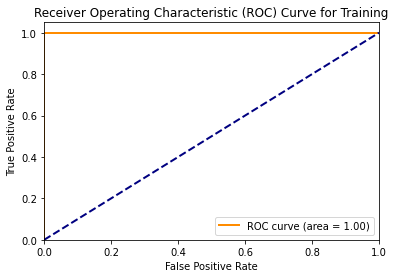

AUROC for Validation: 0.77


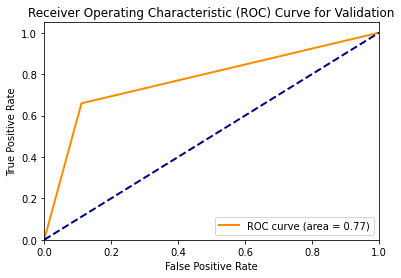

In [108]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

<span style="color:green"> Графік тренувального датасету показує, що модель працює занадто ідеально. Водночас графік валідаційного датасету демонструє гірші результати. Це свідчить про те, що модель перенавчена. </span>

In [109]:
#Виведемо глибину дерева. 
model.tree_.max_depth

26

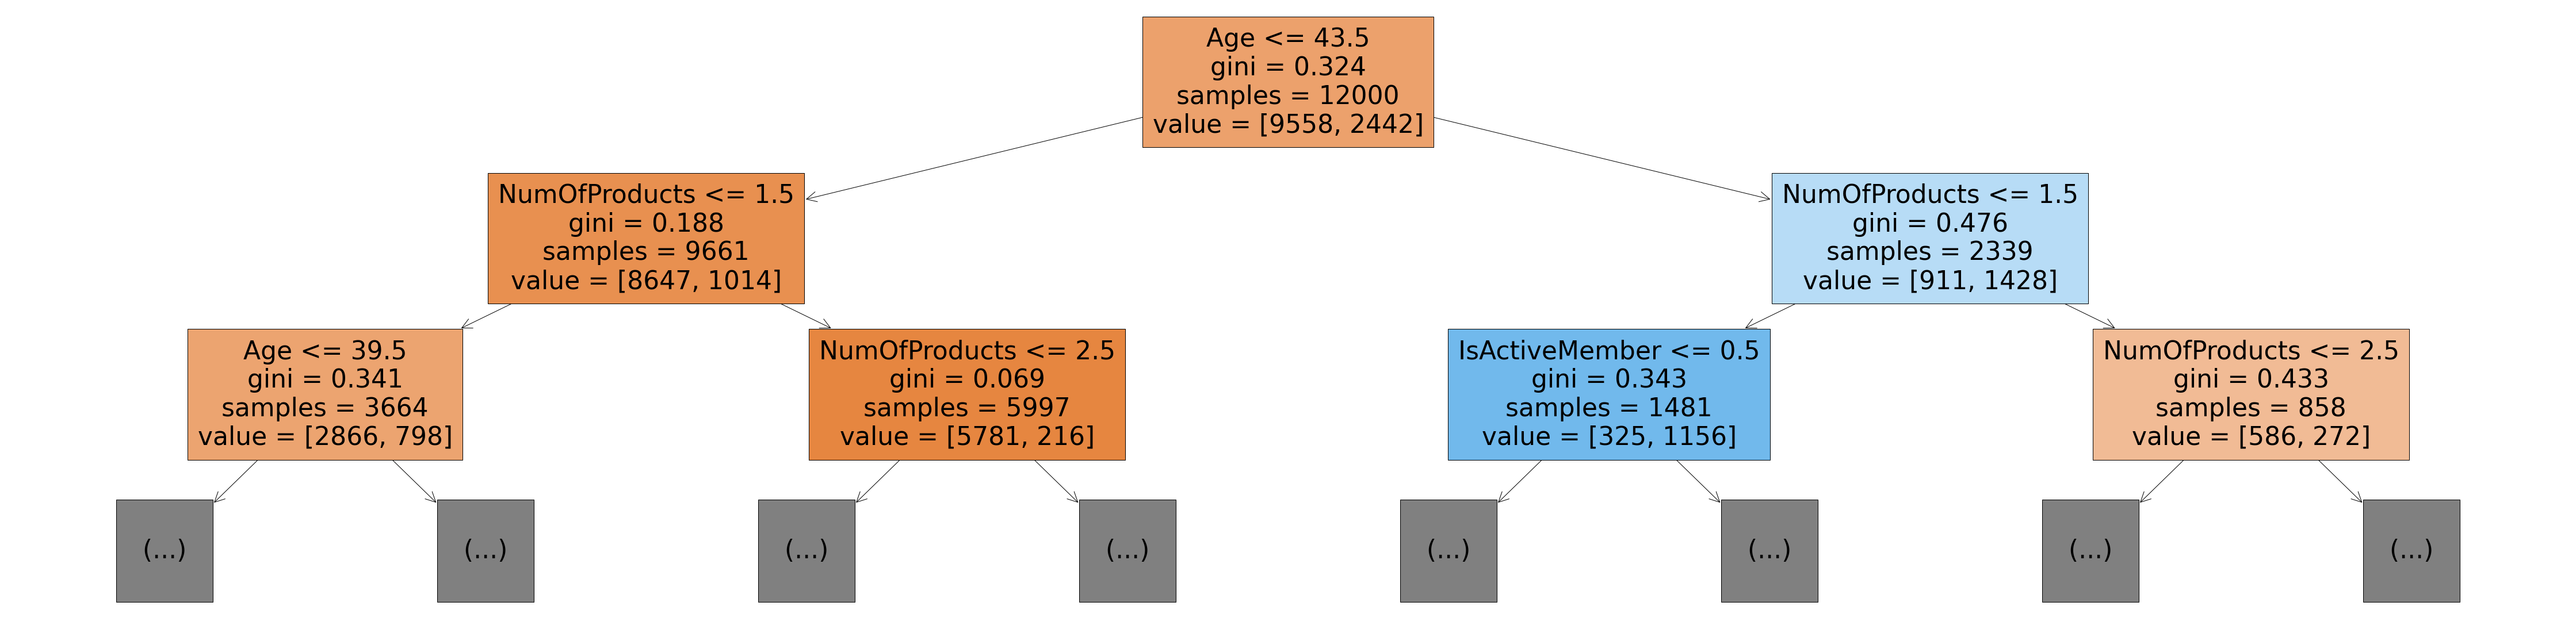

In [110]:
#Побудуємо дерево до глибини 2 включно. 
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

<span style="color:green"> Дерево показує, що найвпливовіша ознака — це вік. Клієнти, молодші за 43.5 років, поводяться інакше, ніж ті, хто старші. Важливою ознакою також є кількість продуктів, якими користується клієнт. Ознака активного членства теж має значення, особливо для визначення позитивного класу, це видно з блакитного кольору вузла на схемі. Проте вплив цієї ознаки є меншим, оскільки вона з’являється на нижчих рівнях дерева, а отже, меншою мірою визначає основний поділ даних. </span>

In [111]:
model.feature_importances_.round(2)

array([0.12, 0.36, 0.05, 0.08, 0.17, 0.01, 0.03, 0.13, 0.01, 0.02, 0.01,
       0.02])

In [112]:
#Створимо датафрейм з feature importances
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

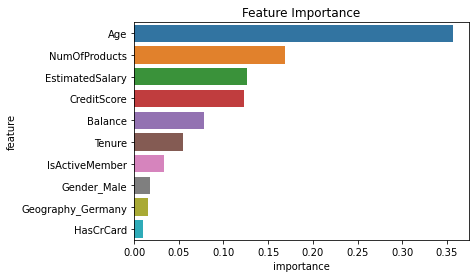

In [113]:
#Подивимося на найвпливовіші ознаки 
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [114]:
#Після експериментів зупинилась на цих параметрах: 
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, random_state=42)

In [115]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, random_state=42)

AUROC for Training: 0.92


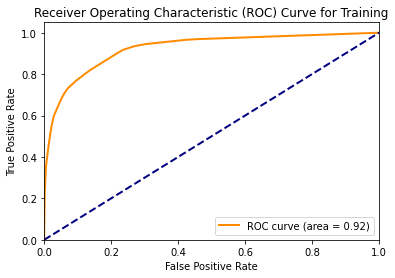

AUROC for Validation: 0.92


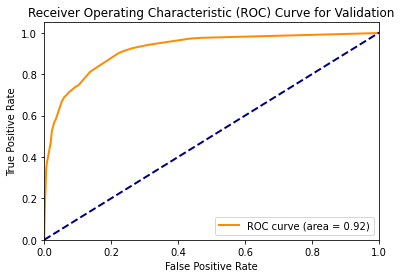

In [116]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

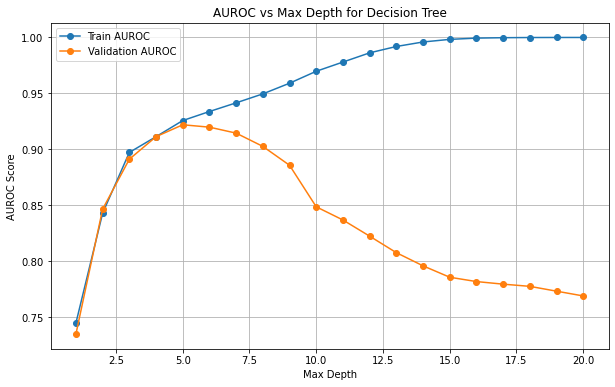

In [117]:
# Діапазон значень max_depth
max_depth_values = range(1, 21)

train_auroc = []
val_auroc = []

for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, train_targets)

    train_preds = model.predict_proba(X_train)[:, 1]
    val_preds = model.predict_proba(X_val)[:, 1]

    train_auroc.append(roc_auc_score(train_targets, train_preds))
    val_auroc.append(roc_auc_score(val_targets, val_preds))

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_auroc, label="Train AUROC", marker='o')
plt.plot(max_depth_values, val_auroc, label="Validation AUROC", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("AUROC Score")
plt.title("AUROC vs Max Depth for Decision Tree")
plt.legend()
plt.grid()
plt.show()

In [118]:
#Можна також пройтись циклом та визначити оптимальну кількість листків 
def evaluate_decision_tree_auc(X_train, X_val, train_targets, val_targets):
    """
    Evaluate decision tree parameters using validation AUC score.
    Returns top 10 parameter combinations.
    """
    # Step 1: Find best max_depth
    max_depths = range(1, 31)
    depth_results = []
    
    for depth in max_depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, train_targets)
        
        train_preds = model.predict_proba(X_train)[:, 1]
        val_preds = model.predict_proba(X_val)[:, 1]
        
        train_auc = roc_auc_score(train_targets, train_preds)
        val_auc = roc_auc_score(val_targets, val_preds)
        
        depth_results.append({
            'max_depth': depth,
            'train_auc': train_auc,
            'val_auc': val_auc
        })
    
    # Convert to DataFrame and find best depth
    depth_df = pd.DataFrame(depth_results)
    best_depth = depth_df.loc[depth_df['val_auc'].idxmax(), 'max_depth']
    
    # Step 2: Using best max_depth, find best min_samples_leaf
    leaf_range = range(1, 101)
    leaf_results = []
    
    for leaf in leaf_range:
        model = DecisionTreeClassifier(
            max_depth=best_depth,
            min_samples_leaf=leaf,
            random_state=42
        )
        model.fit(X_train, train_targets)
        
        train_preds = model.predict_proba(X_train)[:, 1]
        val_preds = model.predict_proba(X_val)[:, 1]
        
        train_auc = roc_auc_score(train_targets, train_preds)
        val_auc = roc_auc_score(val_targets, val_preds)
        
        leaf_results.append({
            'max_depth': best_depth,
            'min_samples_leaf': leaf,
            'train_auc': round(train_auc, 4),
            'val_auc': round(val_auc, 4)
        })
    
    # Convert to DataFrame and get top 10 results based on validation AUC
    leaf_df = pd.DataFrame(leaf_results)
    top_10_results = leaf_df.nlargest(10, 'val_auc')
    
    # Find absolute best parameters
    best_row = top_10_results.iloc[0]
    print(f"\nBest Parameters:")
    print(f"max_depth: {int(best_row['max_depth'])}")
    print(f"min_samples_leaf: {int(best_row['min_samples_leaf'])}")
    print(f"Validation AUC: {best_row['val_auc']:.4f}")
    
    return top_10_results.style.background_gradient(
        subset=['train_auc', 'val_auc'],
        cmap='YlGnBu'
    )

# Usage
results = evaluate_decision_tree_auc(X_train, X_val, train_targets, val_targets)
results


Best Parameters:
max_depth: 5
min_samples_leaf: 49
Validation AUC: 0.9243


,max_depth,min_samples_leaf,train_auc,val_auc
48,5,49,0.925800,0.924300
49,5,50,0.925800,0.924200
50,5,51,0.925800,0.924200
51,5,52,0.925800,0.924200
52,5,53,0.925800,0.924200
53,5,54,0.925800,0.924200
54,5,55,0.925800,0.924200
55,5,56,0.925800,0.924200
56,5,57,0.925800,0.924200
62,5,63,0.925200,0.924200


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [119]:
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=49, random_state=42)

In [120]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=49, random_state=42)

In [121]:
test_df = pd.read_csv("test.csv")

preprocessed_test_df = preprocess_new_data(test_df, encoder, scaler, scaler_numeric=False)

In [122]:
preprocessed_test_df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,1.0
1,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,1.0
2,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,1.0


In [123]:
probabilities = model.predict_proba(preprocessed_test_df)[:,1]

In [124]:
preprocessed_test_df["Exited"] = probabilities
preprocessed_test_df.describe().round(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,Exited
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.0000,1.000000e+04,10000.00000,10000.00000,10000.00000,10000.0000,10000.00000
mean,658.09150,37.88260,5.04200,42828.36645,1.58560,0.78030,0.4819,1.185294e+05,0.59550,0.18340,0.22110,0.5558,0.20793
std,72.16863,8.16614,2.79768,59904.66156,0.53094,0.41406,0.4997,7.558253e+04,0.49082,0.38701,0.41501,0.4969,0.29465
min,431.00000,18.00000,0.00000,0.00000,1.00000,0.00000,0.0000,4.477300e+02,0.00000,0.00000,0.00000,0.0000,0.00000
25%,602.00000,32.00000,3.00000,0.00000,1.00000,1.00000,0.0000,8.341915e+04,0.00000,0.00000,0.00000,0.0000,0.00892
50%,661.00000,37.00000,5.00000,0.00000,2.00000,1.00000,0.0000,1.229254e+05,1.00000,0.00000,0.00000,1.0000,0.04173
75%,708.00000,42.00000,7.00000,109927.33500,2.00000,1.00000,1.0000,1.557898e+05,1.00000,0.00000,0.00000,1.0000,0.23791
max,850.00000,74.00000,11.00000,186788.96000,4.00000,1.00000,1.0000,6.090906e+06,1.00000,1.00000,1.00000,1.0000,1.00000


In [125]:
#Подивимось скільки значень кожного класу передбачила модель на тестових даних 
rounded = preprocessed_test_df["Exited"].round()
counts = rounded.value_counts()
counts

0.0    8492
1.0    1508
Name: Exited, dtype: int64

In [126]:
submission_df = pd.read_csv("sample_submission.csv")

In [127]:
submission_df["Exited"] = preprocessed_test_df["Exited"]

In [128]:
submission_df.head()

,id,Exited
0,15000,0.237911
1,15001,0.027613
2,15002,0.027613
3,15003,0.770925
4,15004,0.027613


In [89]:
submission_df.to_csv("submission_log_reg.csv", index=False)

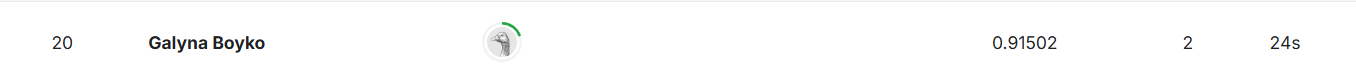